<a href="https://colab.research.google.com/github/TimoLloMac/GitHubExercise/blob/main/Project_3_1_McKee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3 - SQL 1 - Chinook


## Project Definition

Our goal is to use SQL queries to learn about a provided dataset from a fictional company, Chinook Industries. We aim to find interesting questions that can be answered using newly learned SQL syntax.

We will route SQL queries through this notebook, but will only be using Python and imported Python libraries to view and plot data from our SQL queries.


## SQL in sqlite3

In [ ]:
# Import SQLite and Pandas
import sqlite3 as db
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Prevent notebook from displaying installation log
#Install sqlite3 command-line tool

%%capture
%%bash
apt-get update
apt-get install -y sqlite3


In [ ]:
!sqlite3 --help


Usage: sqlite3 [OPTIONS] FILENAME [SQL]
FILENAME is the name of an SQLite database. A new database is created
if the file does not previously exist.
OPTIONS include:
   -A ARGS...           run ".archive ARGS" and exit
   -append              append the database to the end of the file
   -ascii               set output mode to 'ascii'
   -bail                stop after hitting an error
   -batch               force batch I/O
   -box                 set output mode to 'box'
   -column              set output mode to 'column'
   -cmd COMMAND         run "COMMAND" before reading stdin
   -csv                 set output mode to 'csv'
   -deserialize         open the database using sqlite3_deserialize()
   -echo                print commands before execution
   -init FILENAME       read/process named file
   -[no]header          turn headers on or off
   -help                show this message
   -html                set output mode to HTML
   -interactive         force interactive I/O
   -j

In [ ]:
!sqlite3 --version

3.37.2 2022-01-06 13:25:41 872ba256cbf61d9290b571c0e6d82a20c224ca3ad82971edc46b29818d5dalt1


##Data Sources

The following rescources are provided on sqlitetutorial.net:

The [Chinook sample](https://www.sqlitetutorial.net/sqlite-sample-database/) is our sample database for this project.

- A zip file of [sqlite DB](https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip)

- An [Entity-Relationship (ER) diagram](https://www.sqlitetutorial.net/wp-content/uploads/2018/03/sqlite-sample-database-diagram-color.pdf)

We also have:

- An [image showing ER symbols and their meanings](https://d2slcw3kip6qmk.cloudfront.net/marketing/pages/chart/erd-symbols/ERD-Notation.PNG)


In [ ]:
#Check for the Chinook file, download it and list its contents
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip


Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [ ]:
#Unzip the database file
!unzip -u chinook.zip


Archive:  chinook.zip


In [ ]:
#Show current files and directories
!ls -la

total 1180
drwxr-xr-x 1 root root   4096 Feb 24 13:50 .
drwxr-xr-x 1 root root   4096 Feb 24 13:49 ..
-rw-r--r-- 1 root root 884736 Nov 29  2015 chinook.db
-rw-r--r-- 1 root root 305596 Feb 24 13:50 chinook.zip
drwxr-xr-x 4 root root   4096 Feb 20 14:24 .config
drwxr-xr-x 1 root root   4096 Feb 20 14:24 sample_data


## Query using Python


In [ ]:
# Connect to a sqlite database and load a result set into a data frame
db_con = db.connect("chinook.db")


First, getting an overview of all the tables in the data set:

In [ ]:
#List tables
tables_query = '''
SELECT name FROM sqlite_master WHERE type='table';
'''

tables = pd.read_sql_query(tables_query , db_con)
tables

,name
0,albums
1,sqlite_sequence
2,artists
3,customers
4,employees
5,genres
6,invoices
7,invoice_items
8,media_types
9,playlists


We'll now look at the Playlists table to get started.

In [ ]:
# Select the first 10 entries from the playlists table
query = '''
  SELECT *
  FROM playlists
  LIMIT 10
'''

playlists = pd.read_sql_query( query , db_con)
playlists

,PlaylistId,Name
0,1,Music
1,2,Movies
2,3,TV Shows
3,4,Audiobooks
4,5,90’s Music
5,6,Audiobooks
6,7,Movies
7,8,Music
8,9,Music Videos
9,10,TV Shows


In [ ]:
# Count unique names from the playlists table
query = '''
  SELECT COUNT (DISTINCT Name)
  from playlists
'''

playlist_types = pd.read_sql_query( query , db_con)
playlist_types

,COUNT (DISTINCT Name)
0,14


In [ ]:
# Show unique names from the playlists table
query = '''
  SELECT DISTINCT Name,
  COUNT(Name)
  from playlists
  GROUP BY Name
'''

playlist_types = pd.read_sql_query( query , db_con)
playlist_types

,Name,COUNT(Name)
0,90’s Music,1
1,Audiobooks,2
2,Brazilian Music,1
3,Classical,1
4,Classical 101 - Deep Cuts,1
5,Classical 101 - Next Steps,1
6,Classical 101 - The Basics,1
7,Grunge,1
8,Heavy Metal Classic,1
9,Movies,2


In [ ]:
#Look at playlist_track table

query = '''
  select *
  from playlist_track
  limit 10
'''

playlist_tracks = pd.read_sql_query( query , db_con)
playlist_tracks

,PlaylistId,TrackId
0,1,3402
1,1,3389
2,1,3390
3,1,3391
4,1,3392
5,1,3393
6,1,3394
7,1,3395
8,1,3396
9,1,3397


In [ ]:
# Show number of tracks on each playlist by ID
query = '''
  SELECT DISTINCT PlaylistId,
  COUNT(1) as num_tracks
  from playlist_track
  GROUP BY PlaylistId
'''

playlist_types = pd.read_sql_query( query , db_con)
playlist_types

,PlaylistId,num_tracks
0,1,3290
1,3,213
2,5,1477
3,8,3290
4,9,1
5,10,213
6,11,39
7,12,75
8,13,25
9,14,25


In [ ]:
# Add playlist names to track counts
query = '''
  SELECT DISTINCT pt.PlaylistId,
  p.Name,
  COUNT(1) as num_tracks
  from playlist_track as pt
  LEFT JOIN playlists AS p
  ON pt.PlaylistId = p.PlaylistId
  GROUP BY pt.PlaylistId
'''

playlist_names_num_tracks = pd.read_sql_query(query, db_con)
playlist_names_num_tracks

,PlaylistId,Name,num_tracks
0,1,Music,3290
1,3,TV Shows,213
2,5,90’s Music,1477
3,8,Music,3290
4,9,Music Videos,1
5,10,TV Shows,213
6,11,Brazilian Music,39
7,12,Classical,75
8,13,Classical 101 - Deep Cuts,25
9,14,Classical 101 - Next Steps,25


Some playlists are much larger than others. S

Some appeared when we gathered playlist names but not when we counted each playlists's tracks. They may not have any tracks in them.

In [ ]:
# Show tracks in Audiobooks tables
query = '''
SELECT pt.TrackId
FROM playlists as p
LEFT JOIN playlist_track AS pt
ON pt.PlaylistId = p.PlaylistId
WHERE  p.Name = 'Audiobooks'
GROUP BY p.Name
'''

audiobooks_tracks = pd.read_sql_query(query, db_con)
audiobooks_tracks

,TrackId
0,None


In [ ]:
#Check for duplicates in Music - only return unique tracks between them
query = '''
WITH duplicated as (
  SELECT TrackId
    FROM playlist_track
    WHERE PlaylistId IN (1, 8)
    GROUP BY TrackId
    HAVING COUNT(DISTINCT PlaylistId) = 2
)
SELECT DISTINCT TrackId
FROM playlist_track
WHERE PlaylistId IN (1, 8)
AND TrackId NOT IN duplicated
'''

not_duplicated = pd.read_sql_query(query, db_con)
not_duplicated


,TrackId


In [ ]:
#Check for duplicates in Music - count duplicates

query = '''
SELECT COUNT(*) as num_duplicated_tracks
FROM (
  SELECT TrackId,
  COUNT(PlaylistId)
  FROM playlist_track
  WHERE PlaylistId IN (1, 8)
  GROUP BY TrackId
  HAVING COUNT(DISTINCT PlaylistId) = 2
  )
'''

duplicated_count = pd.read_sql_query(query, db_con)
duplicated_count

,num_duplicated_tracks
0,3290


In [ ]:
#Count shared tracks between Classical and three Classical 101 playlists
query = '''
SELECT COUNT(*) as num_shared_tracks
FROM (
  SELECT TrackId,
  COUNT(PlaylistId)
  FROM playlist_track
  WHERE PlaylistId IN (12, 13, 14, 15)
  GROUP BY TrackId
  HAVING COUNT(DISTINCT PlaylistId) > 1
  )
'''

duplicated_count = pd.read_sql_query(query, db_con)
duplicated_count

,num_shared_tracks
0,75


In [ ]:
# Find tracks not in 'Music' but in other playlists
query = '''
SELECT DISTINCT TrackId
FROM playlist_track
WHERE PlaylistId != (1 OR 8)
  AND TrackId NOT IN (
    SELECT TrackId FROM playlist_track
    WHERE PlaylistId = (1 OR 8));
'''

track_ids_not_in_music = pd.read_sql_query(query, db_con)
track_ids_not_in_music

,TrackId
0,2819
1,2820
2,2821
3,2822
4,2823
...,...
208,3362
209,3363
210,3364
211,3428


In [ ]:
#Total of unique tracks in any playlist
query = '''
SELECT COUNT(DISTINCT TrackId) FROM playlist_track
'''

track_unique = pd.read_sql_query(query, db_con)
track_unique

,COUNT(DISTINCT TrackId)
0,3503


In [ ]:
#Find playlist info for the tracks not in Music
query = '''
SELECT DISTINCT pt.TrackId,
COUNT(1),
p.Name
FROM playlist_track AS pt
LEFT JOIN playlists AS p
ON pt.PlaylistId = p.PlaylistId
WHERE pt.PlaylistId != (1 OR 8)
AND pt.TrackId NOT IN (
  SELECT TrackId FROM playlist_track
  WHERE PlaylistId = (1 OR 8))
GROUP BY pt.PlaylistId

'''

tracks_not_in_music_pl_name = pd.read_sql_query(query, db_con)
tracks_not_in_music_pl_name

,TrackId,COUNT(1),Name
0,2819,213,TV Shows


In [ ]:
# Select the first 10 entries from the tracks table
query = '''
  SELECT *
  FROM tracks
  LIMIT 10
'''

tracks = pd.read_sql_query( query , db_con)
tracks

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
5,6,Put The Finger On You,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99
6,7,Let's Get It Up,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99
7,8,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99
8,9,Snowballed,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99
9,10,Evil Walks,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",263497,8611245,0.99


In [ ]:
# Look at tracks in the TV Shows playlists
query = '''
  SELECT t.*,
  p.Name as playlist_name
  FROM playlist_track AS pt
  INNER JOIN tracks AS t
  ON t.TrackId = pt.TrackId
  INNER JOIN playlists as p
  ON p.PlaylistId = pt.PlaylistId
  WHERE pt.PlaylistId IN (3, 10)
  ORDER BY TrackId
'''

tv_tracks = pd.read_sql_query( query , db_con)
tv_tracks

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice,playlist_name
0,2819,Battlestar Galactica: The Story So Far,226,3,18,None,2622250,490750393,1.99,TV Shows
1,2819,Battlestar Galactica: The Story So Far,226,3,18,None,2622250,490750393,1.99,TV Shows
2,2820,Occupation / Precipice,227,3,19,None,5286953,1054423946,1.99,TV Shows
3,2820,Occupation / Precipice,227,3,19,None,5286953,1054423946,1.99,TV Shows
4,2821,"Exodus, Pt. 1",227,3,19,None,2621708,475079441,1.99,TV Shows
...,...,...,...,...,...,...,...,...,...,...
421,3364,"There's No Place Like Home, Pt. 3",261,3,21,None,2582957,486161766,1.99,TV Shows
422,3428,Branch Closing,251,3,22,None,1814855,360331351,1.99,TV Shows
423,3428,Branch Closing,251,3,22,None,1814855,360331351,1.99,TV Shows
424,3429,The Return,251,3,22,None,1705080,343877320,1.99,TV Shows


In [ ]:
#Check for duplicates in TV Shows - count duplicates

query = '''
SELECT COUNT(*) as num_duplicated_tracks
FROM (
  SELECT TrackId,
  COUNT(PlaylistId)
  FROM playlist_track
  WHERE PlaylistId IN (3, 10)
  GROUP BY TrackId
  HAVING COUNT(DISTINCT PlaylistId) = 2
  )
'''

duplicated_count = pd.read_sql_query(query, db_con)
duplicated_count

,num_duplicated_tracks
0,213


In [ ]:
# Look at tracks in the TV Shows playlists with composers other than 'None'
query = '''
  SELECT t.*,
  p.Name as playlist_name
  FROM playlist_track AS pt
  INNER JOIN tracks AS t
  ON t.TrackId = pt.TrackId
  INNER JOIN playlists as p
  ON p.PlaylistId = pt.PlaylistId
  WHERE pt.PlaylistId IN (3) AND t.Composer IS NOT NULL
  ORDER BY TrackId
'''

tv_tracks = pd.read_sql_query( query , db_con)
tv_tracks

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice,playlist_name


In [ ]:
# Select the first 10 entries from the albums table
query = '''
  SELECT *
  FROM albums
  LIMIT 10
'''

albums = pd.read_sql_query( query , db_con)
albums

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
5,6,Jagged Little Pill,4
6,7,Facelift,5
7,8,Warner 25 Anos,6
8,9,Plays Metallica By Four Cellos,7
9,10,Audioslave,8


In [ ]:
# TV Tracks with album
query = '''
SELECT
  t.*,
  p.Name as playlist_name,
  a.Title AS Album
FROM playlist_track AS pt
INNER JOIN tracks AS t
  ON t.TrackId = pt.TrackId
INNER JOIN playlists as p
  ON p.PlaylistId = pt.PlaylistId
INNER JOIN albums AS a
  ON a.AlbumId = t.AlbumId
WHERE pt.PlaylistId IN (3)
ORDER BY TrackId
'''

tv_tracks_w_album = pd.read_sql_query( query , db_con)
tv_tracks_w_album

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice,playlist_name,Album
0,2819,Battlestar Galactica: The Story So Far,226,3,18,None,2622250,490750393,1.99,TV Shows,Battlestar Galactica: The Story So Far
1,2820,Occupation / Precipice,227,3,19,None,5286953,1054423946,1.99,TV Shows,"Battlestar Galactica, Season 3"
2,2821,"Exodus, Pt. 1",227,3,19,None,2621708,475079441,1.99,TV Shows,"Battlestar Galactica, Season 3"
3,2822,"Exodus, Pt. 2",227,3,19,None,2618000,466820021,1.99,TV Shows,"Battlestar Galactica, Season 3"
4,2823,Collaborators,227,3,19,None,2626626,483484911,1.99,TV Shows,"Battlestar Galactica, Season 3"
...,...,...,...,...,...,...,...,...,...,...,...
208,3362,"There's No Place Like Home, Pt. 1",261,3,21,None,2609526,522919189,1.99,TV Shows,"LOST, Season 4"
209,3363,"There's No Place Like Home, Pt. 2",261,3,21,None,2497956,523748920,1.99,TV Shows,"LOST, Season 4"
210,3364,"There's No Place Like Home, Pt. 3",261,3,21,None,2582957,486161766,1.99,TV Shows,"LOST, Season 4"
211,3428,Branch Closing,251,3,22,None,1814855,360331351,1.99,TV Shows,"The Office, Season 3"


In [ ]:
#Bring in album titles for TV tracks and count tracks per album
query = '''
SELECT
  a.Title AS Album,
  COUNT(DISTINCT t.TrackId) AS num_tracks
FROM playlist_track AS pt
INNER JOIN tracks AS t
  ON t.TrackId = pt.TrackId
INNER JOIN playlists AS p
  ON p.PlaylistId = pt.PlaylistId
INNER JOIN albums AS a
  ON a.AlbumId = t.AlbumId
WHERE
  pt.PlaylistId IN (3)
GROUP BY
  a.AlbumId, a.Title
ORDER BY
  a.Title
'''

tv_albums_track_count = pd.read_sql_query(query, db_con)
tv_albums_track_count

,Album,num_tracks
0,Aquaman,1
1,"Battlestar Galactica (Classic), Season 1",24
2,"Battlestar Galactica, Season 3",19
3,Battlestar Galactica: The Story So Far,1
4,"Heroes, Season 1",23
5,"LOST, Season 4",17
6,"Lost, Season 1",25
7,"Lost, Season 2",24
8,"Lost, Season 3",26
9,"The Office, Season 1",6


In [ ]:
# TV tracks with track length and file size information
query = '''
SELECT
  t.Name,
  t.Milliseconds,
  t.Bytes
FROM playlist_track AS pt
INNER JOIN tracks AS t
  ON t.TrackId = pt.TrackId
INNER JOIN playlists as p
  ON p.PlaylistId = pt.PlaylistId
WHERE pt.PlaylistId IN (3)
ORDER BY t.Milliseconds
'''

tv_tracks_length_size = pd.read_sql_query( query , db_con)
tv_tracks_length_size

,Name,Milliseconds,Bytes
0,LOST Season 4 Trailer,112712,20831818
1,LOST In 8:15,497163,98460675
2,Michael's Birthday,1237791,247238398
3,The Dundies,1253541,246845576
4,The Carpet,1264375,256477011
...,...,...,...
208,"Battlestar Galactica, Pt. 2",2956081,521387924
209,The Man With Nine Lives,2956998,577829804
210,"Greetings from Earth, Pt. 1",2960293,536824558
211,Through a Looking Glass,5088838,1059546140


In [ ]:
# TV tracks with album, track length, and file size information
query = '''
SELECT
  t.Name,
  t.Milliseconds,
  t.Bytes,
  a.Title AS Album
FROM playlist_track AS pt
INNER JOIN tracks AS t
  ON t.TrackId = pt.TrackId
INNER JOIN playlists as p
  ON p.PlaylistId = pt.PlaylistId
INNER JOIN albums AS a
  ON a.AlbumId = t.AlbumId
WHERE pt.PlaylistId IN (3)
ORDER BY t.Milliseconds
'''

tv_tracks_length_size_album = pd.read_sql_query( query , db_con)
tv_tracks_length_size_album

,Name,Milliseconds,Bytes,Album
0,LOST Season 4 Trailer,112712,20831818,"LOST, Season 4"
1,LOST In 8:15,497163,98460675,"LOST, Season 4"
2,Michael's Birthday,1237791,247238398,"The Office, Season 2"
3,The Dundies,1253541,246845576,"The Office, Season 2"
4,The Carpet,1264375,256477011,"The Office, Season 2"
...,...,...,...,...
208,"Battlestar Galactica, Pt. 2",2956081,521387924,"Battlestar Galactica (Classic), Season 1"
209,The Man With Nine Lives,2956998,577829804,"Battlestar Galactica (Classic), Season 1"
210,"Greetings from Earth, Pt. 1",2960293,536824558,"Battlestar Galactica (Classic), Season 1"
211,Through a Looking Glass,5088838,1059546140,"Lost, Season 3"


In [ ]:
# TV tracks with album, track length in seconds, and file size information
query = '''
SELECT
  t.Name,
  (t.Milliseconds / 1000) AS Length_seconds,
  (t.Bytes / 1024 / 1024) AS MB,
  a.Title AS Album
FROM playlist_track AS pt
INNER JOIN tracks AS t
  ON t.TrackId = pt.TrackId
INNER JOIN playlists as p
  ON p.PlaylistId = pt.PlaylistId
INNER JOIN albums AS a
  ON a.AlbumId = t.AlbumId
WHERE pt.PlaylistId IN (3)
ORDER BY t.Milliseconds
'''

tv_tracks_seconds_bytes_album = pd.read_sql_query( query , db_con)
tv_tracks_seconds_bytes_album

,Name,Length_seconds,MB,Album
0,LOST Season 4 Trailer,112,19,"LOST, Season 4"
1,LOST In 8:15,497,93,"LOST, Season 4"
2,Michael's Birthday,1237,235,"The Office, Season 2"
3,The Dundies,1253,235,"The Office, Season 2"
4,The Carpet,1264,244,"The Office, Season 2"
...,...,...,...,...
208,"Battlestar Galactica, Pt. 2",2956,497,"Battlestar Galactica (Classic), Season 1"
209,The Man With Nine Lives,2956,551,"Battlestar Galactica (Classic), Season 1"
210,"Greetings from Earth, Pt. 1",2960,511,"Battlestar Galactica (Classic), Season 1"
211,Through a Looking Glass,5088,1010,"Lost, Season 3"


In [ ]:
tv_albums_track_count

,Album,num_tracks
0,Aquaman,1
1,"Battlestar Galactica (Classic), Season 1",24
2,"Battlestar Galactica, Season 3",19
3,Battlestar Galactica: The Story So Far,1
4,"Heroes, Season 1",23
5,"LOST, Season 4",17
6,"Lost, Season 1",25
7,"Lost, Season 2",24
8,"Lost, Season 3",26
9,"The Office, Season 1",6


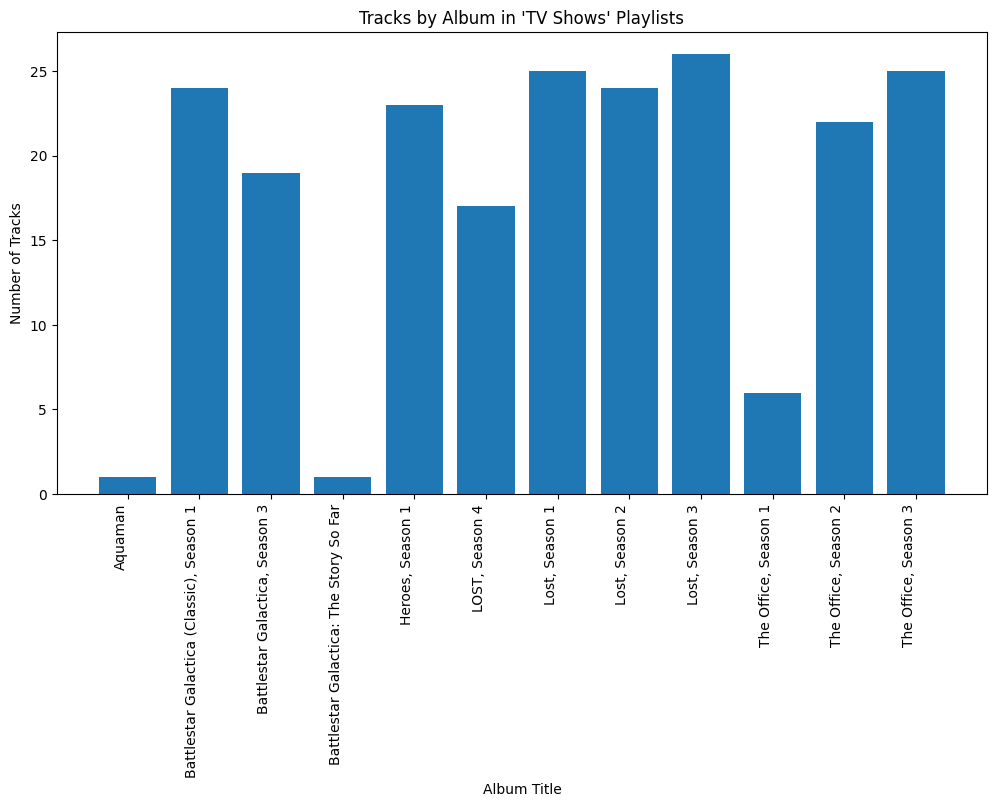

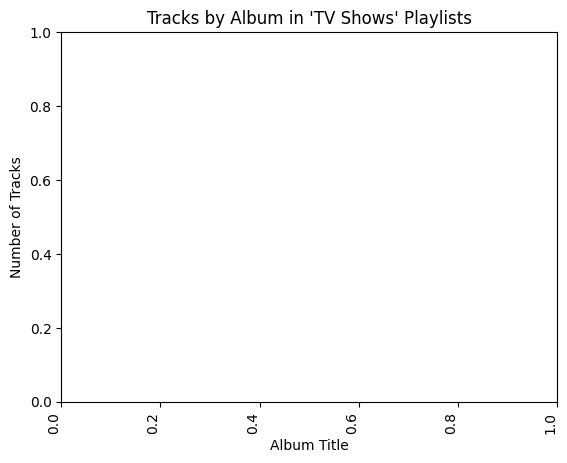

In [ ]:
    # Bar plot showing how many tracks each album contributed to 'TV Shows' playlist
    plt.figure(figsize=(12, 6))
    plt.bar(tv_albums_track_count['Album'],
    tv_albums_track_count['num_tracks'])
    plt.xlabel("Album Title")
    plt.xticks(rotation=90, ha='right')
    plt.ylabel("Number of Tracks")
    plt.title("Tracks by Album in 'TV Shows' Playlists")
    plt.show()
    plt.xlabel("Album Title")
    plt.xticks(rotation=90, ha='right')
    plt.ylabel("Number of Tracks")
    plt.title("Tracks by Album in 'TV Shows' Playlists")
    plt.show()

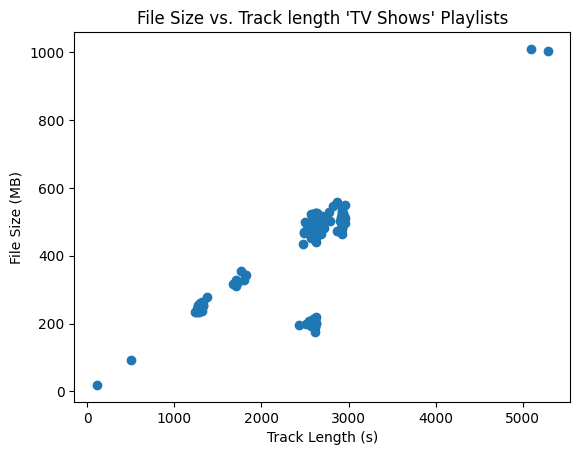

In [ ]:
#Scatter plot of file size and track duration
Length_seconds = tv_tracks_seconds_bytes_album['Length_seconds']
MB = tv_tracks_seconds_bytes_album['MB']
plt.scatter(Length_seconds, MB)
plt.title("File Size vs. Track length 'TV Shows' Playlists")
plt.xlabel('Track Length (s)')
plt.ylabel('File Size (MB)') ;

## Review

- The approach to this project was guided partly by data exploration itself rather than business problems
- More pieces could be added to data visualisations to represent Project/Show, individual album
- The entire Tracks table could be queried to see if there is Audiobook content in the catalog but not on the Chinook playlists
- Difference between individual track file size in relation to duration could be of interest
- Chinook may be interested in why there are playlists that are duplicated, that are empty, or that vary widely in size
